In [1]:

!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 73.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
import torch
from transformers import BitsAndBytesConfig, pipeline

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)


In [3]:

model_id = "llava-hf/llava-1.5-7b-hf"



In [4]:
pipe = pipeline("image-to-text",
                model=model_id,
                model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [6]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS

from PIL import Image


In [12]:
import os

if not os.path.exists(image_path):
    raise ValueError("File path does not exist:", image_path)

In [21]:
from PIL import Image, UnidentifiedImageError

def open_image(image_path):
    try:
        # Try to open the image file
        image = Image.open(image_path)
        return image
    except FileNotFoundError:
        print(f"File not found: {image_path}")
    except UnidentifiedImageError:
        print(f"Cannot identify image file: {image_path}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    return None

# Test the function with the given image path
image_path = "/content/skinDis.jpg"
image = open_image(image_path)

# If image is successfully opened, display it
if image:
    image.show()


Cannot identify image file: /content/skinDis.jpg


In [22]:

import os

# List files in the directory
directory_path = "/content/"
files = os.listdir(directory_path)
print("Files in directory:", files)

Files in directory: ['.config', '.ipynb_checkpoints', 'skinDis.jpg', 'sample_data']


In [26]:
import requests
from PIL import Image
from io import BytesIO

def load_image_from_url(url):
    try:
        # Send a HTTP request to the specified URL
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful

        # Use BytesIO to create an in-memory byte stream from the response content
        image_data = BytesIO(response.content)

        # Open the image using PIL
        image = Image.open(image_data)
        return image
    except requests.RequestException as e:
        print(f"An error occurred while fetching the image: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    return None

# Example usage
image_url = "https://img.lb.wbmdstatic.com/vim/live/webmd/consumer_assets/site_images/articles/health_tools/guide_to_unusual_skin_conditions_slideshow/1800ss_medical_images_rm_cutaneous_amyloidosis-1.jpg?resize=652px:*&output-quality=100"
image = load_image_from_url(image_url)

# If the image is successfully loaded, display it
if image:
    image.show()


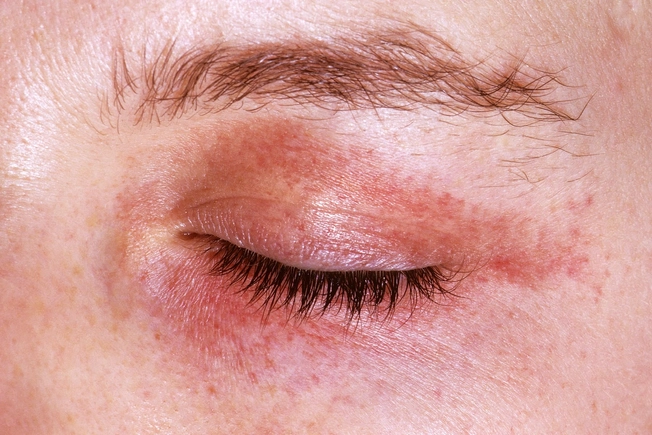

In [32]:

image

In [27]:

# import os
# import cv2
# from PIL import Image, UnidentifiedImageError

# # List files in the directory to ensure the file exists
# directory_path = "/content/"
# files = os.listdir(directory_path)
# print("Files in directory:", files)

# # Check if OpenCV can open the image
# image_path = os.path.join(directory_path, "skinDis.jpg")
# image = cv2.imread(image_path)
# if image is None:
#     print("OpenCV cannot open the image. The file might be corrupted or not an image.")
# else:
#     print("OpenCV successfully opened the image.")
#     # Proceed with PIL if OpenCV can open it
#     try:
#         pil_image = Image.open(image_path)
#         pil_image.show()
#     except UnidentifiedImageError:
#         print(f"Cannot identify image file with PIL: {image_path}")
#     except Exception as e:
#         print(f"An unexpected error occurred with PIL: {e}")


In [15]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:

import locale
print(locale.getlocale())  # Before running the pipeline
# Run the pipeline
print(locale.getlocale())  # After running the pipeline

max_new_tokens = 200

('en_US', 'UTF-8')
('en_US', 'UTF-8')


In [17]:
prompt_instructions = """
Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
what is the image about?
"""



In [18]:
prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"



In [28]:
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
# outputs
# print(outputs[0]["generated_text"])
for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

warnings.filterwarnings("ignore")

USER:  

Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
what is the image about?
ASSISTANT: The image features a close-up of a person's face, focusing on their eye and the surrounding area.
The eye appears to be red, possibly due to an infection or irritation.
The person's eyebrow is also visible, adding to the overall facial detail.
The image is a photograph, and the colors predominant in the photo are red and brown.
The image is about a person's face and the eye's condition.


In [29]:
import warnings
from gtts import gTTS
import numpy as np

torch.cuda.is_available()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using torch {torch.__version__} ({DEVICE})")

import whisper
model = whisper.load_model("medium", device=DEVICE)
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

Using torch 2.3.0+cu121 (cuda)


100%|█████████████████████████████████████| 1.42G/1.42G [00:19<00:00, 76.8MiB/s]


Model is multilingual and has 762,321,920 parameters.


In [31]:
import re

input_text = 'What could be the issue on the skin?'
input_image = image

# load the image
# image = Image.open(input_image)

# prompt_instructions = """
# Describe the image using as much detail as possible, is it a painting, a photograph, what colors are predominant, what is the image about?
# """

# print(input_text)
prompt_instructions = """
Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
""" + input_text
prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

# print(prompt)

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])

if match:
    # Extract the text after "ASSISTANT:"
    extracted_text = match.group(1)
    print(extracted_text)
else:
    print("No match found.")

for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

In the image, there is a person with a red, pink, or reddish-brown mark on their face, which appears to be a skin condition or an injury. The mark is located on the person's cheek, and it is described as a "pimple" or a "red spot." The presence of this mark suggests that the person might be experiencing skin irritation, inflammation, or an infection. It is important to consult a dermatologist or a healthcare professional to determine the cause of the mark and receive appropriate treatment.
USER:  

Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
What could be the issue on the skin?
ASSISTANT: In the image, there is a person with a red, pink, or reddish-brown mark on their face, which appears to be a skin condition or an injury.
The mark is located on the person's cheek, and it is described as a "pimple" or a "red spot."
The presence of this mark suggests that the person might be experiencing skin irrita